In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data/Ubuntu-dialogue-corpus/dialogueText_301.csv')

# Display basic information about the DataFrame
print(df.info())

# Show the first few rows of the DataFrame
print(df.head())

# Display summary statistics of the DataFrame
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display unique values in categorical columns (if any)
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())

# Display the shape of the DataFrame
print(f"\nDataFrame shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16587830 entries, 0 to 16587829
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   folder      int64 
 1   dialogueID  object
 2   date        object
 3   from        object
 4   to          object
 5   text        object
dtypes: int64(1), object(5)
memory usage: 759.3+ MB
None
   folder dialogueID                      date     from       to  \
0     301      1.tsv  2004-11-23T11:49:00.000Z  stuNNed      NaN   
1     301      1.tsv  2004-11-23T11:49:00.000Z  crimsun  stuNNed   
2     301      1.tsv  2004-11-23T11:49:00.000Z  stuNNed  crimsun   
3     301      1.tsv  2004-11-23T11:49:00.000Z  crimsun  stuNNed   
4     301      1.tsv  2004-11-23T11:50:00.000Z  stuNNed  crimsun   

                                                text  
0   any ideas why java plugin takes so long to load?  
1                                          java 1.4?  
2                                                yes  
3       

In [19]:
# Get dialogueIDs with 2 or more messages
dialogue_counts = df['dialogueID'].value_counts()
valid_dialogue_ids = dialogue_counts[dialogue_counts >= 2].index

# Calculate the total character count for each dialogue
dialogue_char_counts = df.groupby('dialogueID')['text'].apply(lambda x: x.str.len().sum())

# Filter dialogues with less than 300,000 characters to fit in GPT context window
valid_dialogue_ids = valid_dialogue_ids[dialogue_char_counts[valid_dialogue_ids] < 300000]

# Randomly select 10,000 unique dialogueIDs from the valid ones
selected_ids = np.random.choice(valid_dialogue_ids, size=min(10000, len(valid_dialogue_ids)), replace=False)

# Create a subset of the dataframe with the selected dialogueIDs
subset_df = df[df['dialogueID'].isin(selected_ids)]

# Sort the subset by dialogueID to group conversations together
subset_df = subset_df.sort_values(['dialogueID', 'date'])

# Save the subset to a new CSV file
subset_df.to_csv('data/10k-dialogue.csv', index=False)

# Print some information about the new dataset
print(f"Number of unique dialogueIDs in the subset: {subset_df['dialogueID'].nunique()}")
print(f"Total number of rows in the subset: {len(subset_df)}")
print(f"Subset saved to '10k-dialogue.csv'")

# Calculate and print the total character count in the subset
total_chars = subset_df['text'].str.len().sum()
print(f"Total character count in the subset: {total_chars}")

Number of unique dialogueIDs in the subset: 10000
Total number of rows in the subset: 437653
Subset saved to '10k-dialogue.csv'
Total character count in the subset: 23671616.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437653 entries, 0 to 437652
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   folder      437653 non-null  int64 
 1   dialogueID  437653 non-null  object
 2   date        437653 non-null  object
 3   from        437646 non-null  object
 4   to          277769 non-null  object
 5   text        437620 non-null  object
dtypes: int64(1), object(5)
memory usage: 20.0+ MB
None
   folder  dialogueID                      date      from        to  \
0       7  100000.tsv  2007-03-01T07:55:00.000Z     dyrne  martalli   
1       7  100000.tsv  2007-03-01T07:56:00.000Z  martalli       NaN   
2       7  100000.tsv  2007-03-01T07:57:00.000Z  martalli       NaN   
3       7  100000.tsv  2007-03-01T07:57:00.000Z     dyrne  martalli   
4       7  100000.tsv  2007-03-01T07:58:00.000Z  martalli       NaN   

                                                text  
0  could you just put a 

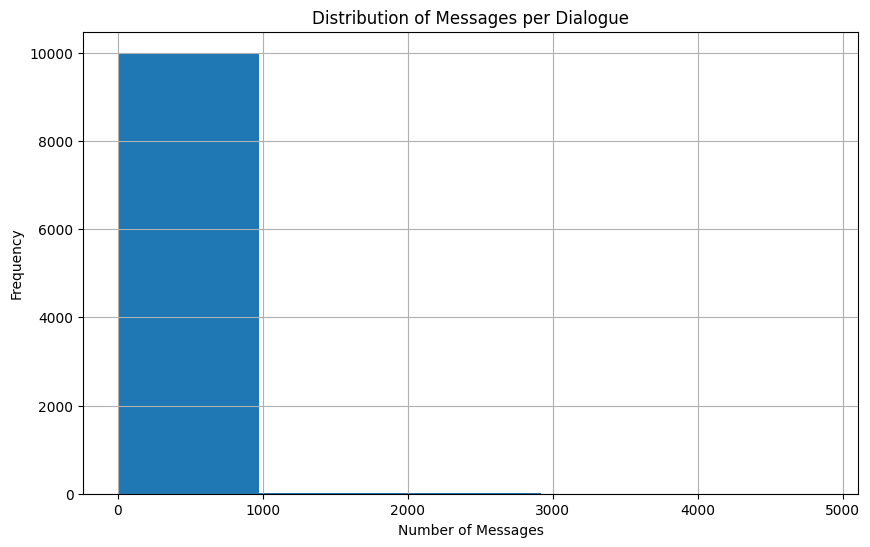

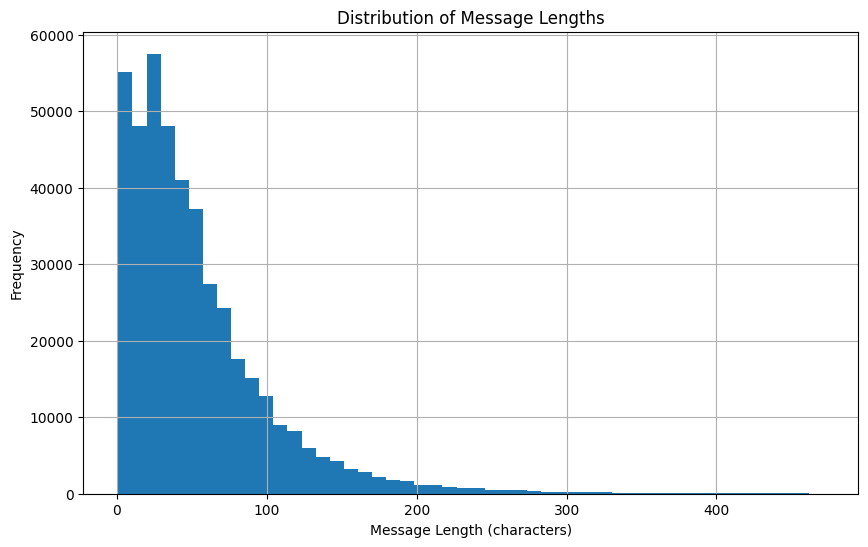

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('data/10k-dialogue.csv')

# Display basic information about the DataFrame
print(df.info())

# Show the first few rows of the DataFrame
print(df.head())

# Display summary statistics of the DataFrame
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display unique values in categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())

# Display the shape of the DataFrame
print(f"\nDataFrame shape: {df.shape}")

# Plot the distribution of messages per dialogue
plt.figure(figsize=(10, 6))
df['dialogueID'].value_counts().hist(bins=5)
plt.title('Distribution of Messages per Dialogue')
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of message lengths
plt.figure(figsize=(10, 6))
df['text'].str.len().hist(bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.show()
